In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import cryptolytic.util.core as util
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data as d
import cryptolytic.data.historical as h
import cryptolytic.model as m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message


ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

In [11]:
def get_df(info):
    """
    Pull info from database and augment it for analysis
    """
    df = sql.get_some_candles(info=info, n=4000, verbose=True)
    df['diff'] = df['high'] - df['low']
    dfarb = sql.get_arb_info(info)
    
    merge_cols = ['trading_pair', 'exchange', 'timestamp', 'period', 'datetime']
    df = df.merge(dfarb, how='inner', on=merge_cols)
    return df 

df = get_df ({'start':'04-05-2019', 'period':300, 'trading_pair':'eth_btc', 'exchange_id':'bitfinex'})
df2 = get_df({'start':'04-05-2019', 'period':300, 'trading_pair':'eth_btc', 'exchange_id':'hitbtc'})

In [12]:
df.head()

,api,exchange,trading_pair,timestamp,period,open,close,high,low,volume,diff,avg,arb_diff,arb_signal
datetime,,,,,,,,,,,,,,
2019-05-04 05:00:00,bitfinex,bitfinex,eth_btc,1556946000,300,0.028510,0.028466,0.028511,0.028447,55.045050,0.000064,0.02845066666666666667,0.000015,0.053894
2019-05-04 05:05:00,bitfinex,bitfinex,eth_btc,1556946300,300,0.028466,0.028470,0.028470,0.028446,61.324268,0.000024,0.02848366666666666733,-0.000014,-0.047981
2019-05-04 05:10:00,bitfinex,bitfinex,eth_btc,1556946600,300,0.028470,0.028470,0.028470,0.028470,814.948094,0.000000,0.02849833333333333333,-0.000028,-0.099421
2019-05-04 05:15:00,bitfinex,bitfinex,eth_btc,1556946900,300,0.028470,0.028504,0.028537,0.028470,1407.485002,0.000067,0.02852733333333333400,-0.000023,-0.081793
2019-05-04 05:20:00,bitfinex,bitfinex,eth_btc,1556947200,300,0.028510,0.028510,0.028510,0.028510,12.000000,0.000000,0.02852833333333333467,-0.000018,-0.064264


In [13]:
len(df2)

1000

In [14]:
def plot_arbitration(df):
    fig, ax1 = plt.subplots()
    plt.title('Arbitration Graph')
    
    color = 'tab:red'
    ax1.set_ylabel('Data', color=color)
    ax1.plot(df.index, df.close, color=color, label=f'{df.exchange[0]}')
    ax1.tick_params(axis='y', labelcolor=color)
    color ='tab:green'
    ax1.plot(df.index, df.avg, color=color, label='Mean Closing Price')
    ax1.legend(loc='lower left')
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Signal', color=color)  
    ax2.plot(df.index,d.denoise(df.arb_signal, 20), color=color, label='Signal')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='lower right')

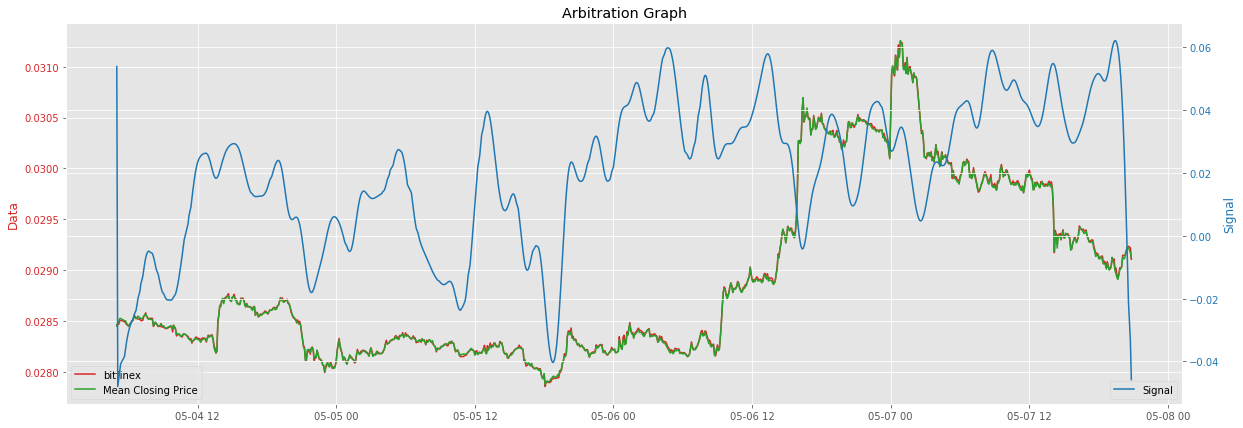

In [15]:
plot_arbitration(df)

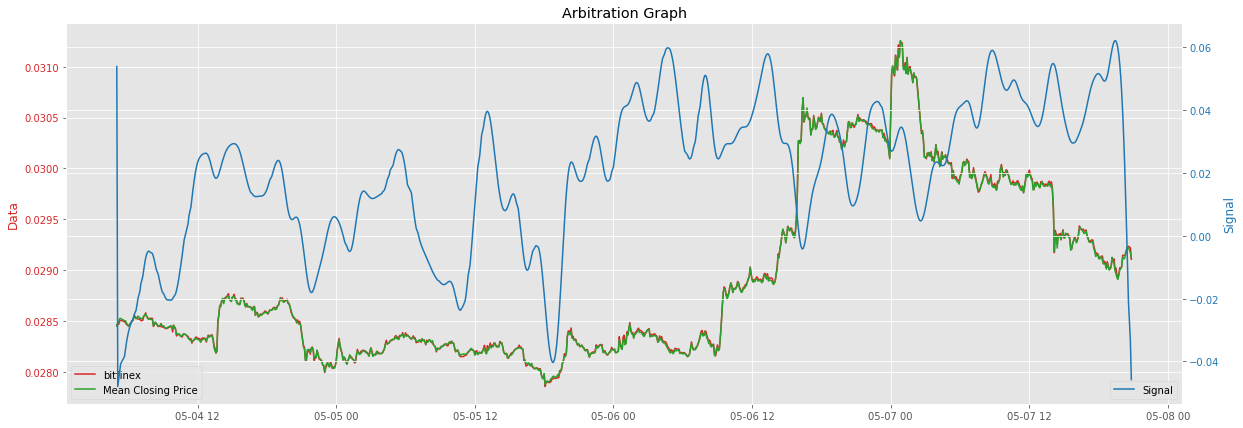

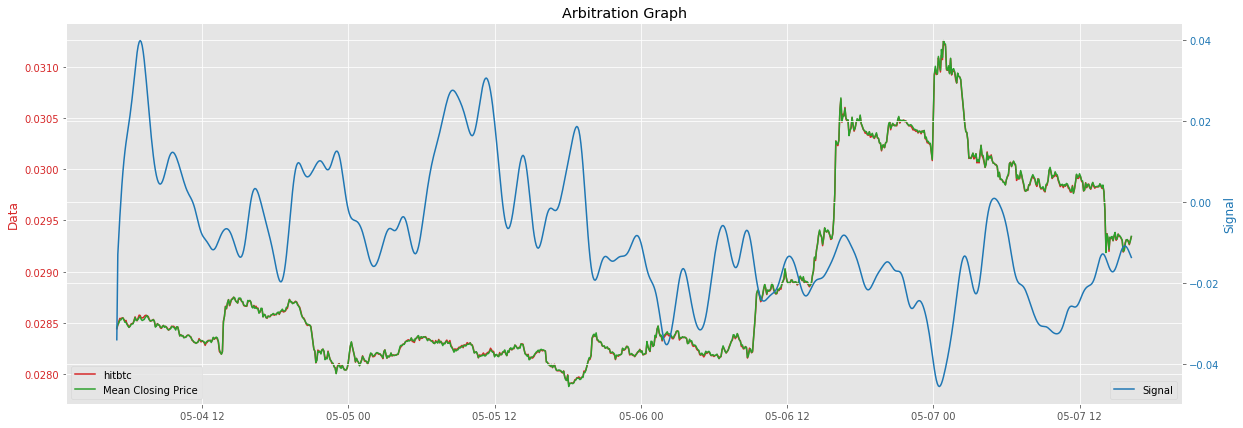

In [17]:
plot_arbitration(df)
plot_arbitration(df2)

In [ ]:
resampled
len(df),len(d.resample_ohlcv(df)), len(df2),len(d.resample_ohlcv(df2))

In [ ]:
yo = {'open' :1}
df[yo.keys()]

In [ ]:
d.resample_ohlcv(df)

In [ ]:
r = np.unique(np.where(resampled.isna())[0])

In [ ]:
help(df.resample)

In [ ]:
pd.to_timdelta(period